<span style='color:Blue ;
             font-size:30px;'>
    Computational Intelligence assignment №1.  </span><br>
<span style='color:Red ;
             font-size:15px;'>
    Student : Amir Zakirov.  </span><br>

## Task 3

In [14]:
import numpy as np
import numpy.linalg as LA
from random import uniform
import matplotlib.pyplot as plt
from scipy.linalg import null_space
import cvxpy as cp
%matplotlib inline
N=100
def_array = np.linspace(-1,10,N)

#### Task 3.1

We need to rewrite the quadratic equation in the proper QP form:
\begin{equation}
\begin{aligned}
\min_{x} \quad & \frac{1}{2}x^{T}Hx + cx + c_0 \\
\textrm{s.t.} \quad & Ax \leq b\\

\end{aligned}
\end{equation}
where
\begin{equation}
\begin{aligned}
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad
H = \begin{bmatrix} h_{11} & h_{12} \\ h_{21} & h_{22} \end{bmatrix} \quad
c^T = \begin{bmatrix} c_1 & c_2 \end{bmatrix}
\end{aligned}
\end{equation}

After derivations:
\begin{equation}
\begin{aligned}
H = \begin{bmatrix} 1 & 0 \\ 0 & 8 \end{bmatrix} \quad
c = \begin{bmatrix} 0 & -32 \end{bmatrix} \quad
c_0 = \begin{bmatrix} 60 \end{bmatrix}
\end{aligned}
\end{equation}

The constraint matrices:

\begin{equation}
\begin{aligned}
A =
\begin{bmatrix} 1 & 1 \\ 1 & 2\\-1 & 0\\0 & -1\\0 & 1 \end{bmatrix} \\
b=\begin{bmatrix} 6\\8\\0\\0\\9 \end{bmatrix}
\end{aligned}
\end{equation}

#### Task 3.2

Case 1: Matrix approach:

In [15]:
#Matrices:
H = np.array([[1,0],[0,8]])
c = np.array([[0],[-32]])
c0 = np.array([[60]])
A = np.array([[1,1],[1,2],[-1,0],[0,-1],[0,1]])
b = np.array([[6],[8],[0],[0],[9]])

#Uknown variable:
x = cp.Variable((2,1))
#Object to minimize:
obj = 0.5*cp.quad_form(x,H) + c.T@x + c0
#Constrains:
constrain = [A@x <= b]
#Solver:
prob = cp.Problem(cp.Minimize(obj),constrain)
prob.solve()

#Print result:
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
x_opt, y_opt = x.value[0], x.value[1]


The optimal value is -4.0
A solution x is
[[-1.94410283e-24]
 [ 4.00000000e+00]]


Direct approach:

In [16]:
#Uknown variables:
x1 = cp.Variable()
x2 = cp.Variable()
#Object to minimize:
obj = 0.5*x1**2 + 4*x2**2 - 32*x2 + 60
#Constrains:
constrain = [x1+x2<=6, x1+2*x2<=8, x1>=0, x2>=0, x2<=9]
#Solver:
prob = cp.Problem(cp.Minimize(obj),constrain)
prob.solve()

#Print result:
print("\nThe optimal value is", prob.value)
print("A solution x1 is")
print(x1.value)
print("A solution x2 is")
print(x2.value)


The optimal value is -4.0
A solution x1 is
-1.944102834068013e-24
A solution x2 is
3.9999999999999996


#### Task 3.3

Domain of the function and its solution:

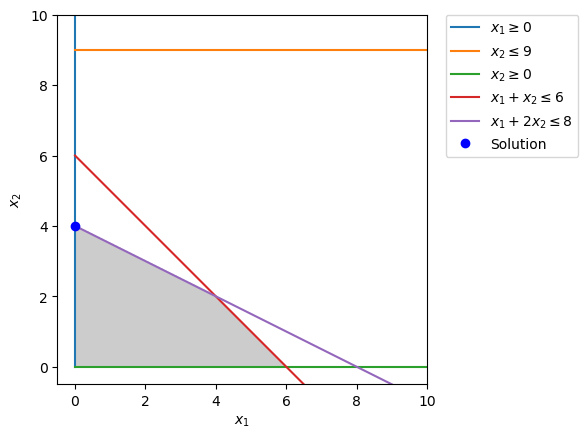

In [17]:
# plot the feasible region
d = np.linspace(0, 10, 200)
x, y = np.meshgrid(d,d)
plt.imshow( ((x>=0) & (y>=0) & (y<=9) & (x+y<=6) & (x+2*y<8)).astype(int) ,
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Greys", alpha = 0.2);


# plot the lines defining the constraints
x = np.linspace(0, 10, 200)

# x1 >= 0
x1 = x*0
y1 = np.linspace(0, 10, 200)

# x2 <= 9
y2 = x*0+9

#x2 >= 0
y3 = x*0

# x1 + x2 <=6
y4 = 6 - x

# x1 + 2*x2 <=8
y5 = (8-x)/2

# Make plot
plt.plot(x1, y1, label=r'$x_1 \geq 0$')
plt.plot(x, y2, label=r'$x_2 \leq 9$')
plt.plot(x, y3, label=r'$x_2 \geq 0$')
plt.plot(x, y4, label=r'$x_1 + x_2 \leq 6$')
plt.plot(x, y5, label=r'$x_1 + 2x_2 \leq 8$')
plt.plot(x_opt, y_opt, 'bo', label = 'Solution')
plt.xlim(-0.5,10)
plt.ylim(-0.5,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

Cost of the function:

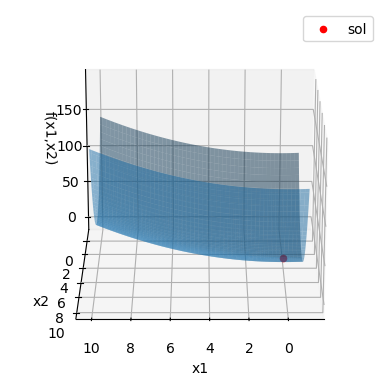

In [36]:
ax = plt.subplot(projection='3d')
ax.view_init(elev=20, azim=90)

#Surface:
x,y = np.meshgrid(def_array.copy(),def_array.copy())
ax.plot_surface(x, y, 0.5*x**2 + 4*y**2 - 32*y + 60, alpha = 0.5)
ax.scatter(x_opt,y_opt,prob.value, label = 'sol', color = 'r')

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1,x2)")

plt.legend()
plt.show()

The graph shows that the function is decreasing towards constraints, so the solution given by cvxpy lies on the boundary